In [42]:
import matplotlib.pyplot as plt

from data.datasets import load_data

data_loader = load_data('lfw')

In [43]:
def load_lfw_sklearn(num_images_per_person):
    dataset = fetch_lfw_people(
        funneled=True,
        min_faces_per_person=num_images_per_person,
        color=True,
        resize=0.4
    )
    
    data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=num_images_per_person, shuffle=False, num_workers = 1
    )

    return data_loader

def load_lfw_torch(batch_size):
    trans = T.Compose([
        T.Resize((256,256)),
        T.CenterCrop(224),
        T.ToTensor()
    ])

    dataset = torchvision.datasets.LFWPeople(
        root='./data', 
        split='train',
        image_set='funneled', 
        transform = trans,
        download=True
    )

    data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=False, num_workers = 1
    )

    return data_loader


Files already downloaded and verified


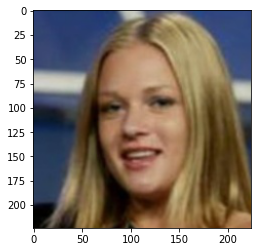

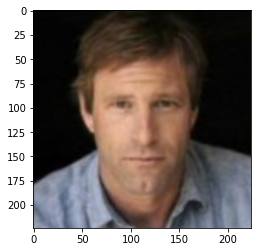

In [44]:
data_loader = load_lfw_torch(10)
for img_batch, targ_batch in data_loader:
    img_1 = img_batch[0]
    img_2 = img_batch[1]
    plt.figure()
    plt.imshow(img_1.permute(1, 2, 0)) 
    plt.figure()
    plt.imshow(img_2.permute(1, 2, 0)) 
    plt.show()
    break

In [45]:
def dif(img_1, img_2):
    print(img_1.shape)
    return 0
    
print(dif(img_1, img_2))

torch.Size([3, 224, 224])
0


In [46]:
data_loader_torch.dataset.view

'people'

In [47]:
trans = T.Compose([
    T.Resize((256,256)),
    T.CenterCrop(224),
    T.ToTensor()
])

dataset = torchvision.datasets.LFWPeople(
    root='./data', 
    split='train',
    image_set='funneled', 
    transform = trans,
    download=True
)


Files already downloaded and verified


In [48]:
num_images_per_person = 10
sklearn_dataset = fetch_lfw_people(
    funneled=True,
    min_faces_per_person=num_images_per_person,
    color=True,
    resize=0.4
)
sklearn_dataset.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [50]:
print(len(dataset.data), dataset.data[0]) 
print(len(dataset.targets), dataset.targets[0])
print(type(dataset.image_set))
data_by_people = {}
for d, t in zip(dataset.data, dataset.targets):
    if t not in data_by_people:
        data_by_people[t] = []
    if len(data_by_people[t]) < num_images_per_person:
        data_by_people[t].append(d)

data_2 = []
targets_2 = []
for t, d in data_by_people.items():
    if len(d) == num_images_per_person:
        targets_2 += [t]*num_images_per_person
        data_2 += d
    elif len(d) > num_images_per_person:
        print('error, too many images per person')

from copy import deepcopy
dataset_2 = deepcopy(dataset)
dataset_2.data = data_2
dataset_2.targets = targets_2

data_loader_2 = torch.utils.data.DataLoader(
    dataset_2, batch_size=num_images_per_person, 
    shuffle=False, num_workers = 1
)

9525 ./data/lfw-py/lfw_funneled/AJ_Cook/AJ_Cook_0001.jpg
9525 0
<class 'str'>


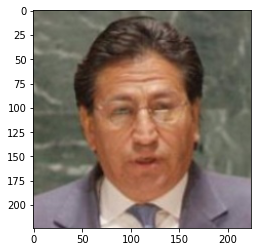

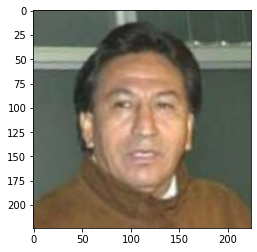

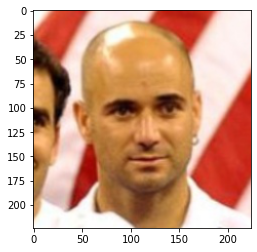

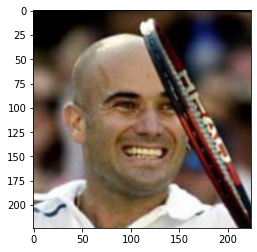

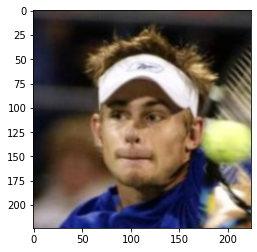

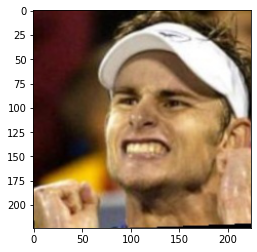

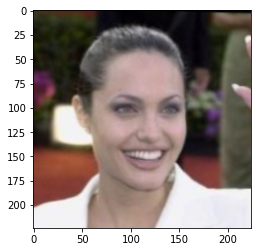

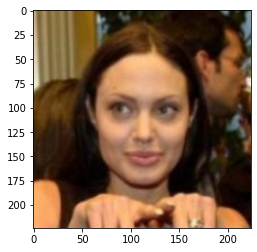

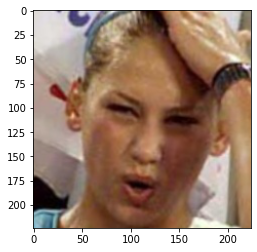

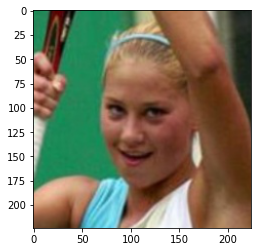

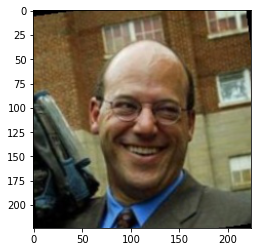

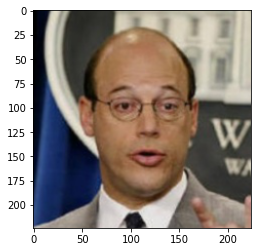

In [52]:
# for img_batch, targ_batch in data_loader:
#     img_1 = img_batch[0]
#     img_2 = img_batch[1]
#     plt.figure()
#     plt.imshow(img_1.permute(1, 2, 0)) 
#     plt.figure()
#     plt.imshow(img_2.permute(1, 2, 0)) 
#     plt.show()
#     break
i = 0
for img_batch, targ_batch in data_loader_2:
    img_1 = img_batch[0]
    img_2 = img_batch[1]
    plt.figure()
    plt.imshow(img_1.permute(1, 2, 0)) 
    plt.figure()
    plt.imshow(img_2.permute(1, 2, 0)) 
    plt.show()
    if i > 4:
        break
    i += 1